In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Techniques for outliers detection
- Z-Score
- IQR

### Algorithms sensitive to outliers:
- Naive Bayes -> Not sensitive
- SVM  -> Sensitive
- Decision Tree -> Not Sensitive
- Ensemble -> Not Sensitive
- Linear Regression -> Sensitive
- Logistic Regression -> Sensitive
- Neural Networks -> Sensitive
- KNN -> Sensitive
- K-Means -> Sensitive
- Hierarchical -> Sensitive
- PCA -> Sensitive
- DBScan -> Sensitive
- K-Medoids -  > Not Sensitive

In [2]:
 data = pd.read_csv("data/titanic.csv")
 data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

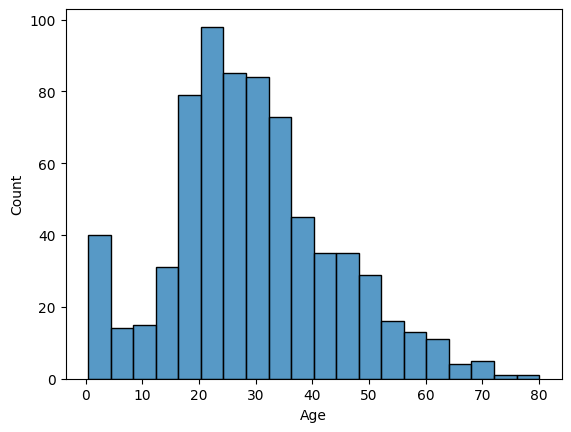

In [4]:
import seaborn as sns
sns.histplot(data['Age'])

/var/folders/z1/8c8tjdhn2z740qzvlw8cs1f80000gn/T/ipykernel_13474/2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

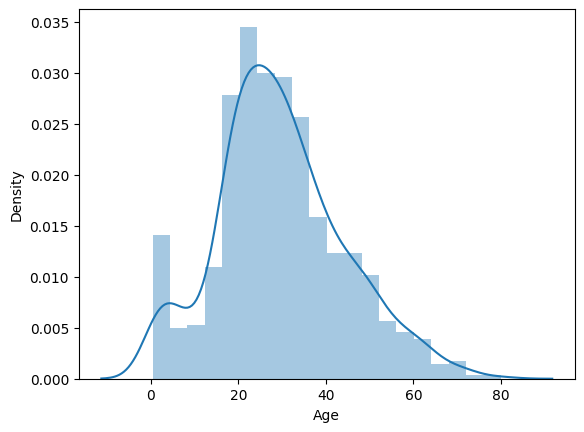

In [5]:
sns.distplot(data['Age'])

/var/folders/z1/8c8tjdhn2z740qzvlw8cs1f80000gn/T/ipykernel_13474/2669338726.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'].fillna(100))


<Axes: xlabel='Age', ylabel='Density'>

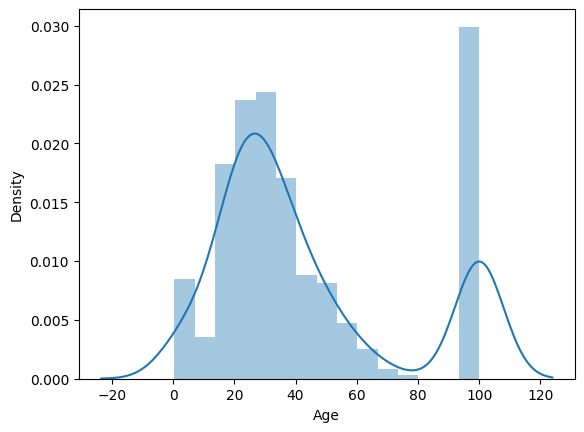

In [6]:
sns.distplot(data['Age'].fillna(100))

Text(0, 0.5, 'No. of passengers')

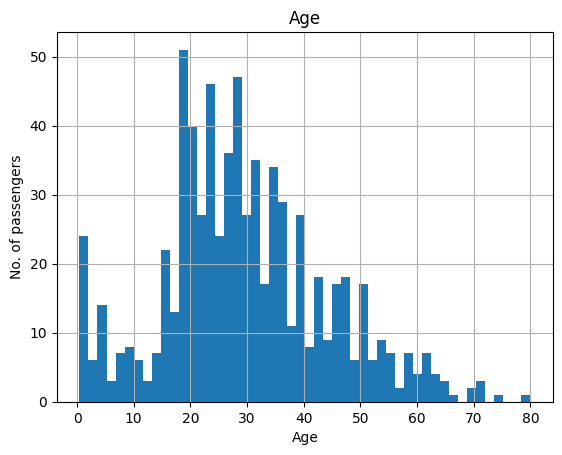

In [8]:
figure = data.Age.hist(bins=50)
figure.set_title("Age")
figure.set_xlabel("Age")
figure.set_ylabel("No. of passengers")

In [9]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
# Gaussian Distr. with 3rd std
upper_boundary = data['Age'].mean() + 3 * data['Age'].std()

In [13]:
upper_boundary

73.27860964406094

In [14]:
lower_boundary = data['Age'].mean() - 3 * data['Age'].std()

In [15]:
lower_boundary

-13.880374349943303

### InterQuantile range

In [17]:
IQR = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
IQR

17.875

In [18]:
#Normal outliers
left_whisker = data['Age'].quantile(0.25) - IQR * 1.5
right_whisker = data['Age'].quantile(0.75) + IQR * 1.5

In [19]:
print(left_whisker,right_whisker)

-6.6875 64.8125


In [21]:
#Extreme outliers
left_whisker_1 = data['Age'].quantile(0.25) - IQR * 3
right_whisker_1 = data['Age'].quantile(0.75) + IQR * 3

In [22]:
print(left_whisker_1,right_whisker_1)

-33.5 91.625


Text(0, 0.5, 'No.of passengers')

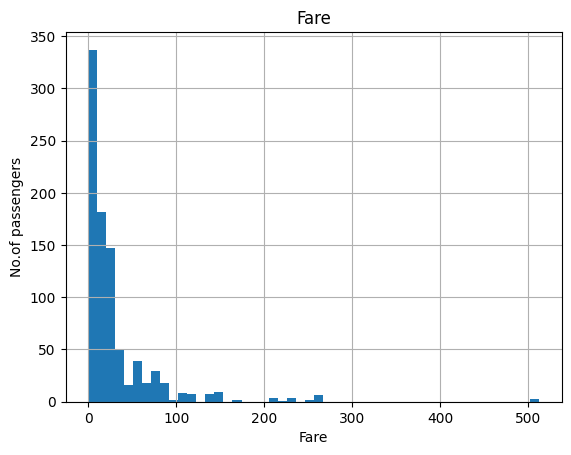

In [26]:
# Skewed Feature
figure = data['Fare'].hist(bins=50)
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("No.of passengers")

<Axes: ylabel='Fare'>

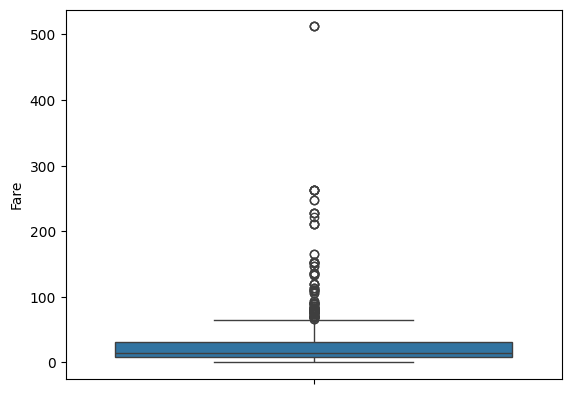

In [28]:
sns.boxplot(data['Fare'])

In [29]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [30]:
IQR = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)
IQR

23.0896

In [33]:
upper_boundary = data['Fare'].mean() + 3 * data['Fare'].std()
lower_boundary = data['Fare'].mean() - 3 * data['Fare'].std()

In [34]:
print(upper_boundary,lower_boundary)

181.2844937601173 -116.87607782296804


In [37]:
left_whisker = data['Fare'].quantile(0.25) - IQR * 1.5
right_whisker = data['Fare'].quantile(0.75) + IQR * 1.5

In [38]:
print(left_whisker,right_whisker)

-26.724 65.6344


In [39]:
left_whisker = data['Fare'].quantile(0.25) - IQR * 3
right_whisker = data['Fare'].quantile(0.75) + IQR * 3

In [40]:
print(left_whisker,right_whisker)

-61.358399999999996 100.2688


In [47]:
data.loc[data['Age'] >= 73, 'Age'] = 73

In [48]:
data.loc[data['Fare'] >= 100, 'Fare'] = 100

<Axes: ylabel='Age'>

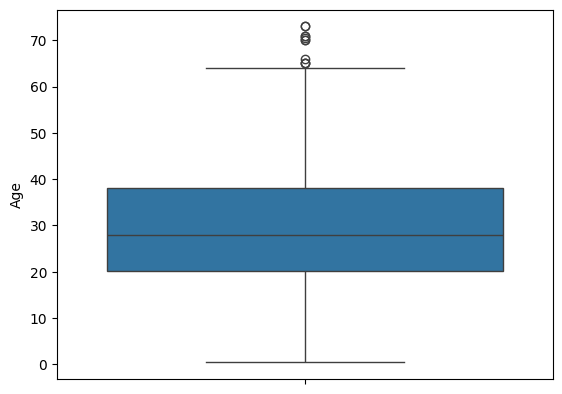

In [49]:
sns.boxplot(data['Age'])

<Axes: ylabel='Fare'>

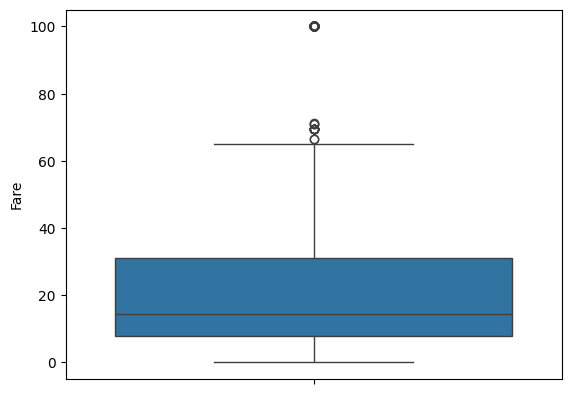

In [50]:
sns.boxplot(data['Fare'])

Text(0, 0.5, 'No.of passengers')

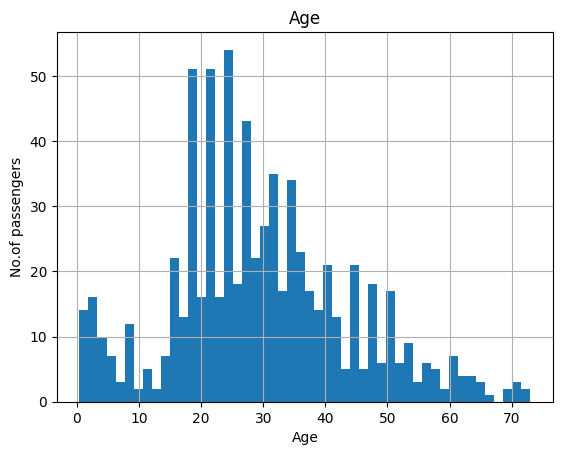

In [51]:
# Skewed Feature
figure = data['Age'].hist(bins=50)
figure.set_title("Age")
figure.set_xlabel("Age")
figure.set_ylabel("No.of passengers")

Text(0, 0.5, 'No.of passengers')

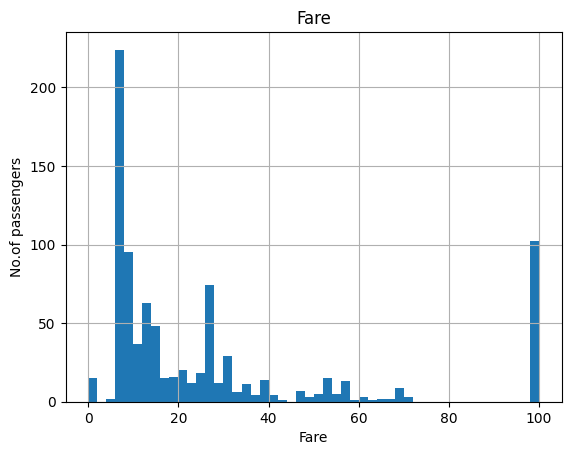

In [52]:
# Skewed Feature
figure = data['Fare'].hist(bins=50)
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("No.of passengers")